# Proyecto 8

## Recolección y análisis exploratorio de los datos

In [21]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

In [22]:
# Read DataFrames
df1_full = pd.read_csv('./project_sql_result_01.csv', sep=',', header=0)
df4_full = pd.read_csv('./project_sql_result_04.csv', sep=',', header=0)
df7_full = pd.read_csv('./project_sql_result_07.csv', sep=',', header=0)

## Análisis exploratorio de DataFrames

In [23]:
# DataFrame information
df1_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [24]:
# DataFrame information
df4_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [25]:
# DataFrame information
df7_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Los tres DataFrames no tienen valores nulos, el tipo de datos por columna es correcto y el nombre de las columnas usa la convencion "snake_case" (solo minusculas, sin espacios ni comas ni punto y comas ni guiones). Todos los datos estan bien, no es necesario modificar nada.

## Análisis de los datos

Para el dataframe 4, verificamos si no tiene valores repetidos respecto a la columna "dropoff_location_name".

In [26]:
#Verify duplicates in col 'dropoff_location_name'
print(df4_full['dropoff_location_name'].duplicated().sum())

0


No hay valores duplicados, por tanto, no es necesario agrupar los datos. A continuación, se muestran los 10 principales barrios en términos de finalización del recorrido:

In [27]:
# Order df4 by 'average_trips'
df4_dropoff_max = df4_full.sort_values(by='average_trips', ascending = False)
df4 = df4_dropoff_max.loc[0:9]
print(df4)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


A continuación se muestran los mismos resultados de manera gráfica.

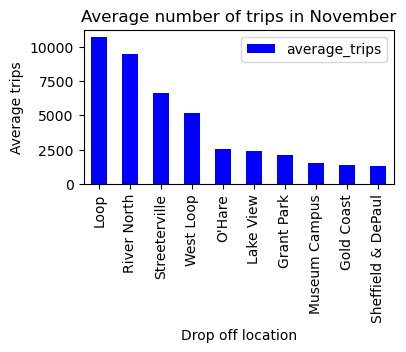

In [28]:
# Bar plot
df4.plot(kind='bar', figsize=[4,2], title='Average number of trips in November',
         x='dropoff_location_name', y='average_trips', color='blue',
        xlabel='Drop off location', ylabel='Average trips', rot=90)
plt.show()

Para el dataframe 1, verificamos si no tiene valores repetidos respecto a la columna "company_name".

In [29]:
# Verify duplicates in col 'dropoff_location_name'
print(df1_full['company_name'].duplicated().sum())

0


No hay valores duplicados, por tanto, no es necesario agrupar los datos. Dado que no hay relacion directa entre los dataframes 1 y 4, se tomará el número de viajes de cada compañía de taxis del 15 y 16 de noviembre de 2017 (trips_amount) para hacer los cdlculos. Entonces, al ordenar se tiene que las empresas de taxis y número de viajes de los 10 barrios principales son:

In [30]:
# Order df1 by 'trips_amount'
df1_dropoff_max = df1_full.sort_values(by='trips_amount', ascending = False)
df1 = df1_dropoff_max.loc[0:9]
print(df1)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


A continuación se muestran los mismos resultados de manera gráfica.

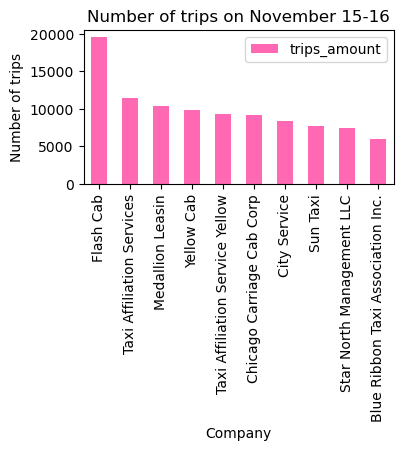

In [31]:
# Bar plot
df1.plot(kind='bar', figsize=[4,2], title='Number of trips on November 15-16',
         x='company_name', y='trips_amount', color='hotpink',
        xlabel='Company', ylabel='Number of trips', rot=90)
plt.show()

**Conclusiones:** Dado que los dataframes fueron resultado de consultas previas donde se agruparon, contaron y sumaron los datos, por tanto, en este análisis sólo se están mostrando los resulados.

## Prueba de hipótesis


Antes de proceder con la prueba de hipótesis, verificamos si el dataframe 7 tiene duplicados respecto a las columnas 'start_ts' y 'duration_seconds', y si es así, los eliminamos.

In [32]:
# Delete duplicates according to cols 'start_ts' and 'duration_seconds'
df7 = df7_full.drop_duplicates(subset=['start_ts','duration_seconds']).reset_index(drop=True)

# Verify duplicates according to columns 'start_ts' and 'duration_seconds'
print(df7[['start_ts','duration_seconds']].duplicated().sum())

0


Se realizará la prueba de hipótesis (prueba T) para determinar si los promedios son iguales, se usará tambien la prueba de Levene (para verificar si las vaianzas de las muestras son iguales), usando un umbral de significación (alfa) del 5%. Se crea una nueva columna para extraer el día sábado de la colunma 'start_ts'.

In [33]:
# Umbral alpha for the T-test
alpha = 0.05

# Change date format (if applicable)
df7['day'] = pd.to_datetime(df7['start_ts'], format='%Y-%m-%d %H:%M:%S')

# Extract day of month
df7['day'] = df7['day'].dt.day

# Saturdays on November 2017
saturdays = [4,11,18,25]

Se definen las siguientes variables:

$\mu_{sat}$ = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados lluviosos.

$\mu_{other}$ = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los días diferentes a los sábados lluviosos.

Se desea probar que $\mu_{sat}$ != $\mu_{other}$.

Por convención, H0 debe expresar igualdad, entonces al final de la prueba se invertirá el resultado.

**Hipótesis nula (H0):** $\mu_{sat}$ = $\mu_{other}$.

**Hipótesis alternativa (H1):** $\mu_{sat}$ != $\mu_{other}$.

In [34]:
# Extract samples
saturday_rain = df7.loc[( df7['day'].isin(saturdays) ) & (df7['weather_conditions']=='Bad'), 'duration_seconds']
other_day = df7.loc[~( df7['day'].isin(saturdays) ) | (df7['weather_conditions']!='Bad'), 'duration_seconds']

In [35]:
# Verify equal variances (Levene test)
levene = st.levene(saturday_rain, other_day)
print("Levene test p-value:", levene.pvalue)
print("Variances are different" if levene.pvalue < alpha else "Variances are the same")

# Show samples variances (optional)
print(f"Saturday_rain sample variance: {np.var(saturday_rain):.3f}")
print(f"Other_day sample variance: {np.var(other_day):.3f}")

Levene test p-value: 0.9806770360671218
Variances are the same
Saturday_rain sample variance: 561003.096
Other_day sample variance: 597389.542


In [36]:
# T-test, variances are the same, then 'equal_var=True'
prove = st.ttest_ind(saturday_rain, other_day,
                     alternative = 'two-sided', equal_var = True)
print("T-test p-value:", prove.pvalue)

# Conclusion of T-test
print("H0 is rejected" if prove.pvalue < alpha else "H0 cannot be rejected")

T-test p-value: 7.397770692813658e-08
H0 is rejected


**Conclusion:** La hipótesis nula donde $\mu_{sat}$ = $\mu_{other}$ es rechazada, por lo tanto, la hipótesis nula donde $\mu_{sat}$ != $\mu_{other}$ no se puede rechazar.